In [17]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [19]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [7 3 1 1 8 7 4 6 7 3]


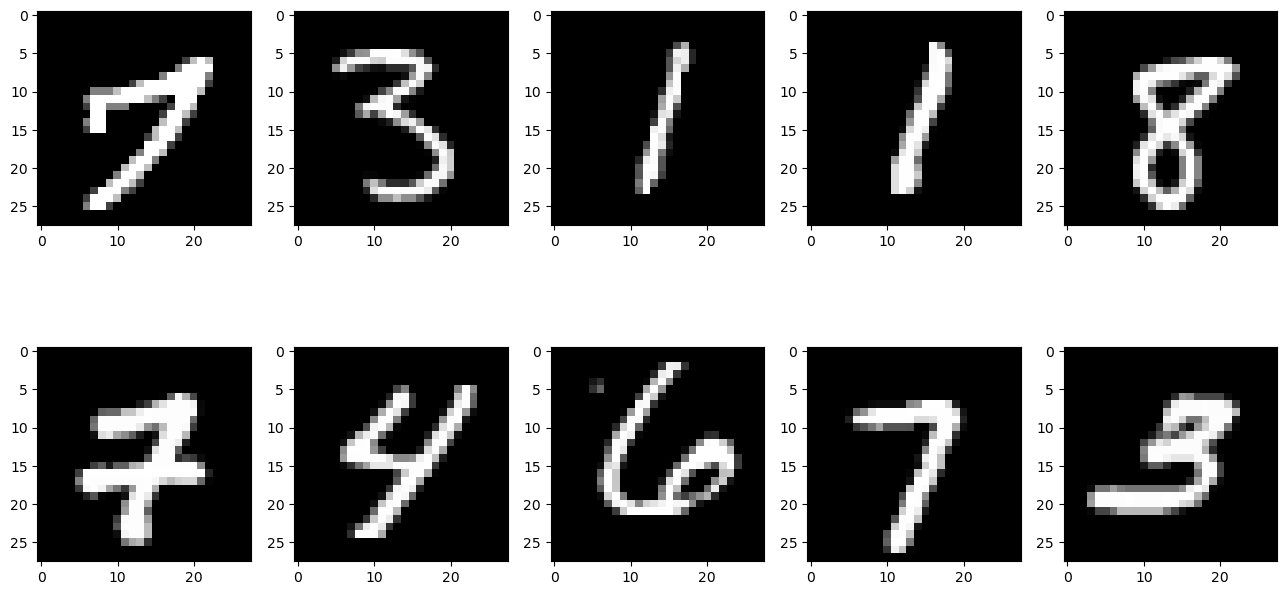

In [21]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [23]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [25]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [29]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8433 - loss: 0.5100
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9613 - loss: 0.1269
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9733 - loss: 0.0891
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9788 - loss: 0.0691
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9826 - loss: 0.0549
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9838 - loss: 0.0508
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9865 - loss: 0.0408
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9882 - loss: 0.0342
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9901 - loss: 0.0295
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9912 - loss: 0.0264


Plot the loss and accuracy graphs

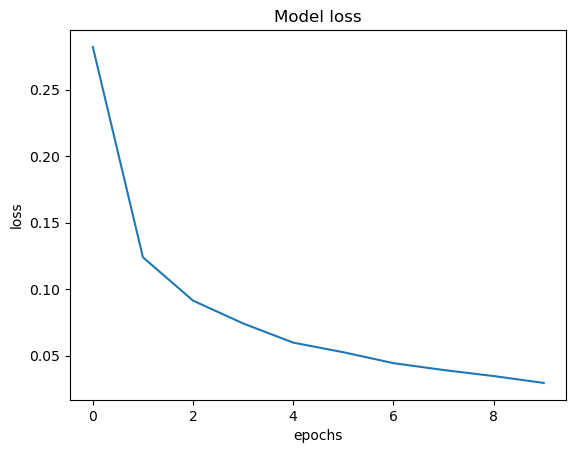

In [31]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

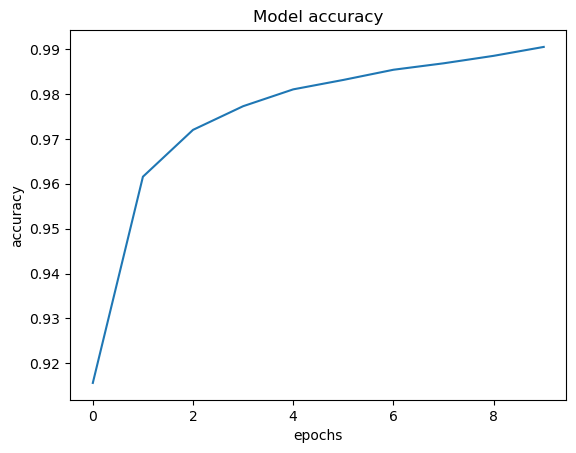

In [33]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [43]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9708 - loss: 0.1125
Loss of the Test dataset is: 0.09610570967197418
Accuracy of the test dataset is: 0.9757000207901001


Save the model weights

In [41]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

ValueError: The filename must end in `.weights.h5`. Received: filepath=MNIST_WEIGHTS_V1.h5

In [9]:
!pip install tensorflow

# Hyperparameter Tuning

In [45]:

# Import additional necessary libraries
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define a function to create the model
def create_model(optimizer='adam', init='glorot_uniform'):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(512, kernel_initializer=init, activation='relu'))
    model.add(Dense(10, kernel_initializer=init, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
batch_size = [10, 20, 40]
epochs = [10, 20]
optimizer = ['SGD', 'RMSprop', 'Adam']
init = ['glorot_uniform', 'normal', 'uniform']
param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer, init=init)

# Conduct Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_data, to_categorical(train_target))

# Summarize results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

# Adding L1 and L2 Regularization

In [47]:

from tensorflow.keras.regularizers import l1, l2

# Define a function to create the model with L1 and L2 regularization
def create_model_with_regularization(optimizer='adam', init='glorot_uniform', reg_type=None, reg_value=0.01):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    if reg_type == 'l1':
        model.add(Dense(512, kernel_initializer=init, activation='relu', kernel_regularizer=l1(reg_value)))
    elif reg_type == 'l2':
        model.add(Dense(512, kernel_initializer=init, activation='relu', kernel_regularizer=l2(reg_value)))
    else:
        model.add(Dense(512, kernel_initializer=init, activation='relu'))
    model.add(Dense(10, kernel_initializer=init, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create models with L1 and L2 regularization
model_l1 = create_model_with_regularization(reg_type='l1', reg_value=0.01)
model_l2 = create_model_with_regularization(reg_type='l2', reg_value=0.01)

# Train the models
history_l1 = model_l1.fit(train_data, to_categorical(train_target), epochs=10, batch_size=20, validation_split=0.2, verbose=1)
history_l2 = model_l2.fit(train_data, to_categorical(train_target), epochs=10, batch_size=20, validation_split=0.2, verbose=1)

# Evaluate the models
score_l1 = model_l1.evaluate(test_data, to_categorical(test_target), verbose=0)
score_l2 = model_l2.evaluate(test_data, to_categorical(test_target), verbose=0)

print(f"L1 Regularization - Test loss: {score_l1[0]}, Test accuracy: {score_l1[1]}")
print(f"L2 Regularization - Test loss: {score_l2[0]}, Test accuracy: {score_l2[1]}")


Epoch 1/10


C:\Users\Chamith\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2400/2400 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8511 - loss: 57.8199 - val_accuracy: 0.9212 - val_loss: 9.0928
Epoch 2/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8817 - loss: 8.9616 - val_accuracy: 0.8967 - val_loss: 6.6820
Epoch 3/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9047 - loss: 6.3654 - val_accuracy: 0.9045 - val_loss: 5.4583
Epoch 4/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9035 - loss: 4.8274 - val_accuracy: 0.9168 - val_loss: 4.5288
Epoch 5/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9060 - loss: 4.4984 - val_accuracy: 0.8837 - val_loss: 4.3622
Epoch 6/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9000 - loss: 4.0477 - val_accuracy: 0.9073 - val_loss: 3.4100
Epoch 7/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8998 - loss: 3.4729 - val_accuracy: 0.9066 - val_loss: 2.8112
Epoch 8/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8966 - loss: 3.1356 - va